29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.7601 - loss: 0.6682
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step - accuracy: 0.8781 - loss: 0.3385
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.8940 - loss: 0.2902
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9076 - loss: 0.2572
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9158 - loss: 0.2340
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8994 - loss: 0.2928
Test accuracy: 0.8981999754905701
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predictions for the first two images:
[[1.06166835e-05 1.60154467e-09 3.24210646e-07 1.24456690e-07
  2.84864086e-07 2.45149597e-03 7.78331469e-07 1.23423599e-02
  4.16609255e-04 9.84777331e-01]
 [9.05972774e-05 3.23505867e-09 9.99765813e-01 2.25437020e-07
  3.86221873e-05 1.66162700e-12 1.04813924e-04 1.79356042e-14
  1.62509348e-08 1.87062171e-11]]


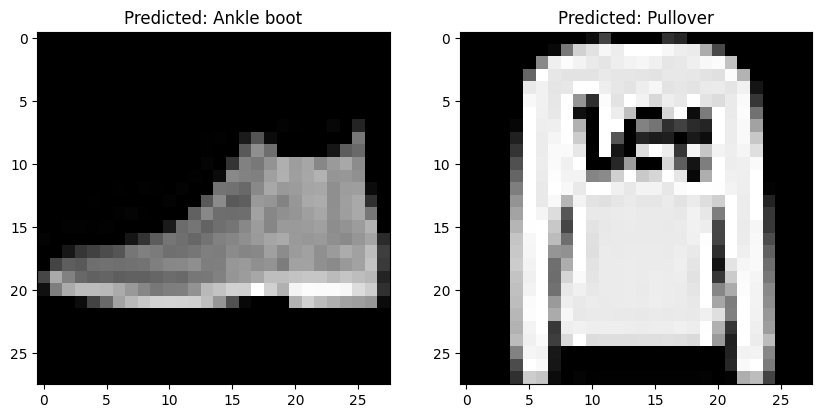

In [1]:
# Convolutional Neural Network (CNN):
# Using Keras and classes in both Python and R, develop a CNN with six layers to classify the Fashion MNIST dataset.
# Prediction:
# Make predictions for at least two images from the Fashion MNIST dataset.

# Install necessary libraries
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data for the CNN (add a channel dimension)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5) # Reduced epochs for demonstration

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

# Make predictions for two images
predictions = model.predict(x_test[:2])

# Print predictions
print("Predictions for the first two images:")
print(predictions)

# Display the images and their predicted labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
for i in range(2):
  plt.subplot(1, 2, i + 1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  predicted_label = np.argmax(predictions[i])
  plt.title(f"Predicted: {class_names[predicted_label]}")
plt.show()
